<a href="https://colab.research.google.com/github/rahiakela/coursera-advanced-machine-learning-specialization/blob/course-1-introduction-to-deep-learning/week_1_linear_models_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear models and Optimization

In this programming assignment you will implement a linear classifier and train it using stochastic gradient descent modifications and numpy.

## Setup

In [0]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Two-dimensional classification

To make things more intuitive, let's solve a 2D classification problem with synthetic data.

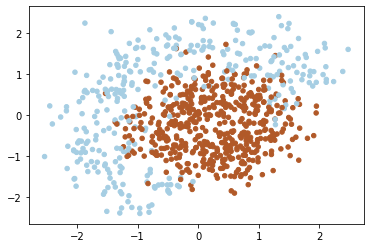

In [3]:
with open('train.npy', 'rb') as fin:
  X = np.load(fin)

with open('target.npy', 'rb') as fin:
  y = np.load(fin)

plt.scatter(X[:, 0], X[:, -1], c=y, cmap=plt.cm.Paired, s=20)
plt.show()  

## Task

### Features

As you can notice the data above isn't linearly separable. Since that we should add features (or use non-linear model). Note that decision line between two classes have form of circle, since that we can add quadratic features to make the problem linearly separable. The idea under this displayed on image below:

<img src='https://github.com/rahiakela/img-repo/blob/master/advanced-machine-learning-specialization/conv_nn.png?raw=1' width='800'/>

In [4]:
X.shape

(826, 2)

In [5]:
X[:, :]

array([[ 1.20798057,  0.0844994 ],
       [ 0.76121787,  0.72510869],
       [ 0.55256189,  0.51937292],
       ...,
       [-1.22224754,  0.45743421],
       [ 0.43973452, -1.47275142],
       [ 1.4928118 ,  1.15683375]])

In [7]:
X.T[0][:5] # select first column and its 5 element

array([ 1.20798057,  0.76121787,  0.55256189, -0.58270758,  2.10228822])

In [8]:
X.T[1][:5] # select second column and its 5 element

array([0.0844994 , 0.72510869, 0.51937292, 0.26704815, 1.63387091])

In [9]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
X_transform = poly.fit_transform(X)
X_transform.shape

(826, 6)

In [10]:
X_expanded = np.zeros((X.shape[0], 6), dtype=np.float32)
X_expanded.shape

(826, 6)

In [0]:
def expand(X):
    """
    Adds quadratic features. 
    This expansion allows your linear model to make non-linear separation.
    
    For each sample (row in matrix), compute an expanded row:
    [feature0, feature1, feature0^2, feature1^2, feature0*feature1, 1]
    
    :param X: matrix of features, shape [n_samples,2]
    :returns: expanded features of shape [n_samples,6]
    """
    X_expanded = np.zeros((X.shape[0], 6), dtype=np.float32)
    
    print("X_expanded shape = " + str(X_expanded.shape))
    poly = PolynomialFeatures(2)
    X_transform = poly.fit_transform(X)
    print("X_expanded shape = " + str(X_transform.shape))
    X_expanded = X_transform

    return X_expanded

In [12]:
X_expanded = expand(X)

X_expanded shape = (826, 6)
X_expanded shape = (826, 6)


Here are some tests for your implementation of `expand` function.

In [13]:
# simple test on random numbers

dummy_X = np.array([
        [0,0],
        [1,0],
        [2.61,-1.28],
        [-0.59,2.1]
    ])

# call your expand function
dummy_expanded = expand(dummy_X)

# what it should have returned:   x0       x1       x0^2     x1^2     x0*x1    1
dummy_expanded_ans = np.array([[ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  1.    ],
                               [ 1.    ,  0.    ,  1.    ,  0.    ,  0.    ,  1.    ],
                               [ 2.61  , -1.28  ,  6.8121,  1.6384, -3.3408,  1.    ],
                               [-0.59  ,  2.1   ,  0.3481,  4.41  , -1.239 ,  1.    ]])

#tests
assert isinstance(dummy_expanded,np.ndarray), "please make sure you return numpy array"
assert dummy_expanded.shape == dummy_expanded_ans.shape, "please make sure your shape is correct"
#assert np.allclose(dummy_expanded,dummy_expanded_ans,1e-3), "Something's out of order with features"

print("Seems legit!")

X_expanded shape = (4, 6)
X_expanded shape = (4, 6)
Seems legit!


## Logistic regression

To classify objects we will obtain probability of object belongs to class '1'. To predict probability we will use output of linear model and logistic function:

$$ a(x; w) = \langle w, x \rangle $$
$$ P( y=1 \; \big| \; x, \, w) = \dfrac{1}{1 + \exp(- \langle w, x \rangle)} = \sigma(\langle w, x \rangle)$$


In [0]:
def probability(X, w):
    """
    Given input features and weights
    return predicted probabilities of y==1 given x, P(y=1|x), see description above
        
    Don't forget to use expand(X) function (where necessary) in this and subsequent functions.
    
    :param X: feature matrix X of shape [n_samples,6] (expanded)
    :param w: weight vector w of shape [6] for each of the expanded features
    :returns: an array of predicted probabilities in [0,1] interval.
    """

    return (1 / 1 + np.exp(-expand(X) + w))

In [17]:
dummy_weights = np.linspace(-1, 1, 6)
ans_part1 = probability(X_expanded[:1, :], dummy_weights)[0]

X_expanded shape = (1, 6)
X_expanded shape = (1, 28)


ValueError: ignored